In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import probplot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
len(df.columns) # identify the number of features

2

In [9]:
df.columns #identify the features

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
df.shape # identify the size of the dataset

(30, 2)

In [11]:
df.dtypes # identify the datatypes of the features

YearsExperience    float64
Salary             float64
dtype: object

In [12]:
df.isnull().values.any() #checking if dataset has empty cells

False

In [13]:
df.isnull().sum() # identify the number of empty cells

YearsExperience    0
Salary             0
dtype: int64

### GRAPHICAL UNIVARIANT ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q plot of Salary')

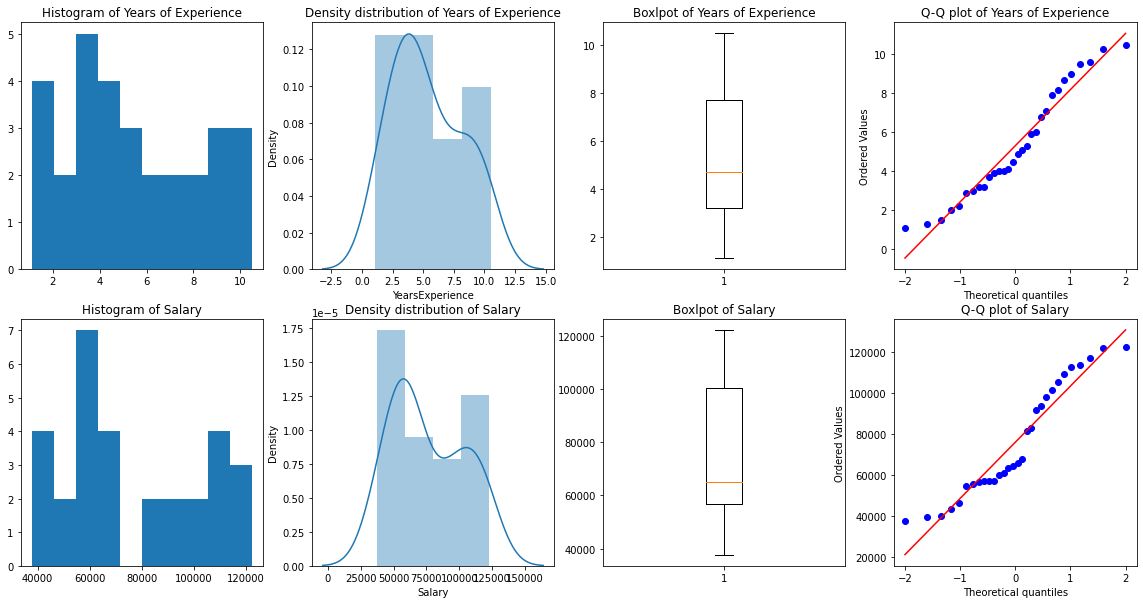

In [14]:
#Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['YearsExperience'],density=False)
plt.title('Histogram of Years of Experience')
plt.subplot(2,4,5)
plt.hist(df['Salary'], density=False)
plt.title("Histogram of Salary")

# Density plot
plt.subplot(2,4,2)
sns.distplot(df['YearsExperience'], kde=True)
plt.title("Density distribution of Years of Experience")
plt.subplot(2,4,6)
sns.distplot(df['Salary'], kde=True)
plt.title("Density distribution of Salary")

# boxplot or violin plot
plt.subplot(2,4,3)
plt.boxplot(df['YearsExperience'])
plt.title("Boxlpot of Years of Experience")
plt.subplot(2,4,7)
plt.boxplot(df['Salary'])
plt.title("Boxlpot of Salary")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of Years of Experience")
plt.subplot(2,4,8)
probplot(df['Salary'], plot=plt)
plt.title("Q-Q plot of Salary")

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data=df).fit()

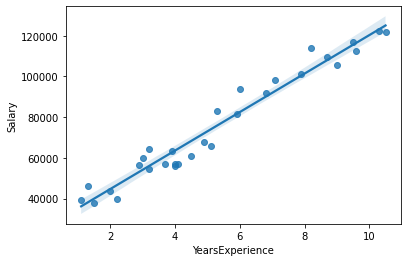

In [16]:
sns.regplot(x='YearsExperience',y='Salary', data=df);

In [20]:
#coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
#t and p value
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)